# Implementing the BA Model from Scratch

In [19]:
import random

class BarabasiAlbertGraph:
    def __init__(self, initial_nodes, m):
        """
        Initialize the BA graph.
        
        Parameters:
        initial_nodes (int): Number of initial nodes (fully connected).
        m (int): Number of edges each new node will add.
        """
        self.graph = {i: set(range(i)) | set(range(i+1, initial_nodes)) for i in range(initial_nodes)}
        self.node_count = initial_nodes
        self.m = m
        self.node_list = list(range(initial_nodes)) * initial_nodes  # Preferential attachment list

    def add_node(self):
        """Adds a new node with `m` edges following preferential attachment."""
        new_node = self.node_count
        self.graph[new_node] = set()
        
        # Select `m` unique targets using preferential attachment
        targets = set()
        while len(targets) < self.m:
            target = random.choice(self.node_list)
            if target not in targets:
                targets.add(target)

        # Add edges to the new node
        for target in targets:
            self.graph[new_node].add(target)
            self.graph[target].add(new_node)
            self.node_list.append(target)

        # Update the node list for preferential attachment
        self.node_list.extend([new_node] * self.m)
        self.node_count += 1

    def generate_graph(self, total_nodes):
        """Generates a BA network up to `total_nodes`."""
        while self.node_count < total_nodes:
            self.add_node()

    def get_graph(self):
        """Returns the adjacency list representation of the graph."""
        return self.graph

# Example usage
initial_nodes = 5  # Initial fully connected nodes
m = 2              # Number of edges per new node
total_nodes = 1000 # Total nodes in final network

ba_graph = BarabasiAlbertGraph(initial_nodes, m)
ba_graph.generate_graph(total_nodes)
graph = ba_graph.get_graph()

# Print a few nodes to check connections
for node in list(graph.keys())[:5]:
    print(f"Node {node}: {graph[node]}")


Node 0: {1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 16, 532, 23, 26, 28, 31, 33, 34, 546, 36, 41, 43, 44, 45, 46, 558, 48, 49, 57, 61, 62, 65, 83, 84, 602, 95, 100, 101, 102, 621, 623, 113, 625, 629, 120, 124, 125, 129, 136, 649, 651, 143, 145, 658, 157, 670, 163, 166, 167, 172, 173, 176, 179, 181, 187, 699, 196, 198, 199, 713, 716, 207, 208, 744, 745, 236, 756, 775, 782, 272, 795, 291, 839, 328, 331, 353, 368, 370, 884, 380, 382, 386, 389, 391, 906, 935, 432, 947, 449, 964, 457, 462, 975, 991, 485, 488, 493}
Node 1: {0, 2, 3, 4, 8, 13, 14, 270, 276, 404, 279, 153, 27, 285, 165, 41, 44, 560, 186, 826, 60, 61, 316, 580, 71, 466, 90, 733, 990, 358, 104, 376, 894}
Node 2: {0, 1, 3, 4, 133, 526, 400, 147, 411, 926, 930, 938, 948, 190, 447, 69, 70, 331, 79, 211, 470, 95, 364, 237, 620, 623, 116, 123, 253}
Node 3: {0, 1, 2, 514, 4, 771, 6, 900, 8, 265, 10, 11, 524, 13, 17, 18, 273, 405, 22, 791, 24, 155, 286, 287, 32, 166, 935, 552, 686, 564, 566, 183, 185, 701, 958, 962, 200, 328, 586, 203, 76, 81

# Creating 100 Instances of BA Graph

In [20]:
num_instances = 100  # Number of graphs to generate
graphs = []

for _ in range(num_instances):
    ba_graph = BarabasiAlbertGraph(initial_nodes, m)
    ba_graph.generate_graph(total_nodes)
    graphs.append(ba_graph.get_graph())

print("Generated 100 BA networks.")


Generated 100 BA networks.


# Computing the Average Clustering Coefficient

Average Clustering Coefficient: 0.033615742159209205


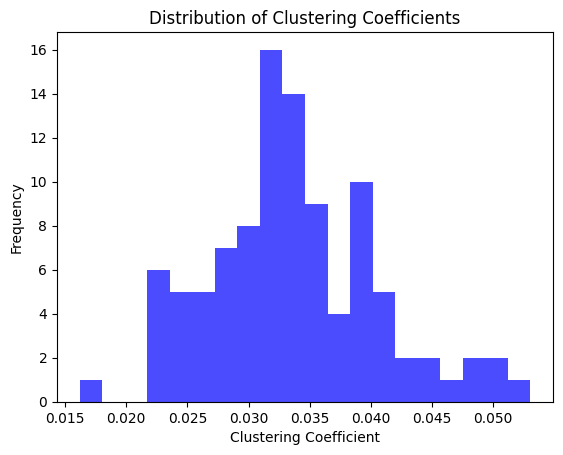

In [21]:
import numpy as np

def clustering_coefficient(graph):
    """
    Compute the average clustering coefficient of a graph.
    """
    clustering_values = []
    
    for node in graph:
        neighbors = graph[node]
        k = len(neighbors)
        if k < 2:
            continue  # Skip if the node has less than 2 neighbors
        
        # Count edges between neighbors
        links = 0
        for neighbor in neighbors:
            links += len(graph[neighbor] & neighbors)
        
        clustering_values.append(links / (k * (k - 1)))
    
    return np.mean(clustering_values)

# Compute clustering coefficient for each instance
clustering_coeffs = [clustering_coefficient(G) for G in graphs]
avg_clustering_coeff = np.mean(clustering_coeffs)

print(f"Average Clustering Coefficient: {avg_clustering_coeff}")

# Plot clustering coefficient distribution
import matplotlib.pyplot as plt

plt.hist(clustering_coeffs, bins=20, color='blue', alpha=0.7)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Clustering Coefficients')
plt.show()


# Computing the Characteristic Path Length

Average Characteristic Path Length: 3.9911159000000005


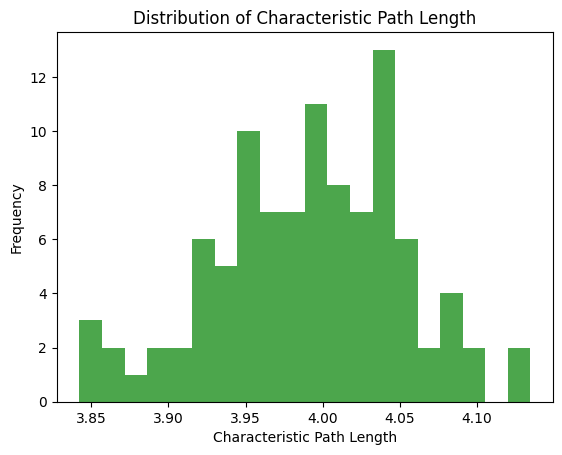

In [23]:
from collections import deque

def bfs_shortest_path(graph, start_node):
    """
    Perform BFS from the start_node to compute shortest paths to all other nodes.
    
    Returns:
    - Dictionary where keys are nodes and values are shortest path distances.
    """
    distances = {node: float('inf') for node in graph}  # Initialize all distances as infinity
    distances[start_node] = 0  # Distance to itself is 0
    
    queue = deque([start_node])
    
    while queue:
        current_node = queue.popleft()
        for neighbor in graph[current_node]:
            if distances[neighbor] == float('inf'):  # Not visited
                distances[neighbor] = distances[current_node] + 1
                queue.append(neighbor)
    
    return distances

def compute_characteristic_path_length(graph):
    """
    Compute the Characteristic Path Length of a graph using BFS.
    """
    path_lengths = []
    
    for node in graph:  # Run BFS from every node
        shortest_paths = bfs_shortest_path(graph, node)
        valid_paths = [dist for dist in shortest_paths.values() if dist != float('inf')]  # Exclude unreachable nodes
        path_lengths.extend(valid_paths)
    
    return np.mean(path_lengths)  # Compute average shortest path length

# Compute CPL for 100 graph instances
characteristic_path_lengths = [compute_characteristic_path_length(G) for G in graphs]
avg_characteristic_path_length = np.mean(characteristic_path_lengths)

print(f"Average Characteristic Path Length: {avg_characteristic_path_length}")

# Plot distribution of CPL
plt.hist(characteristic_path_lengths, bins=20, color='green', alpha=0.7)
plt.xlabel('Characteristic Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Characteristic Path Length')
plt.show()


# Computing and Plotting the Degree Distribution

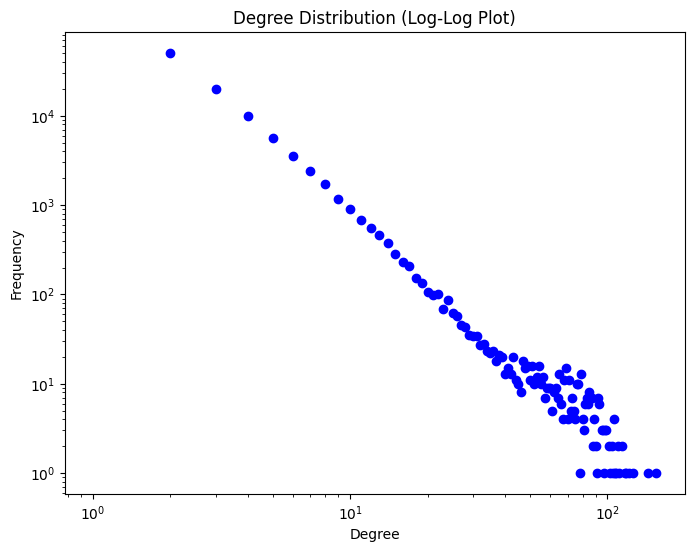

In [22]:
degree_distributions = []

for G in graphs:
    degrees = [len(G[node]) for node in G]
    degree_distributions.extend(degrees)

# Count the occurrences of each degree
degree_counts = np.bincount(degree_distributions)
degrees = np.arange(len(degree_counts))

# Plot degree distribution in log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(degrees[degrees > 0], degree_counts[degrees > 0], 'bo')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Log-Log Plot)')
plt.show()
